Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: spam.csv                
No missing values detected.
Naive Bayes Accuracy: 0.97
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression Accuracy: 0.95
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
    

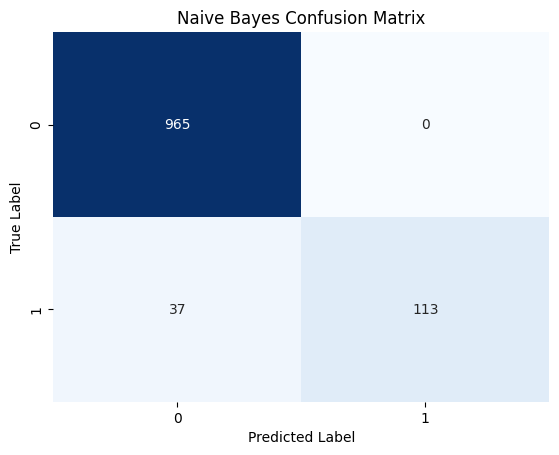

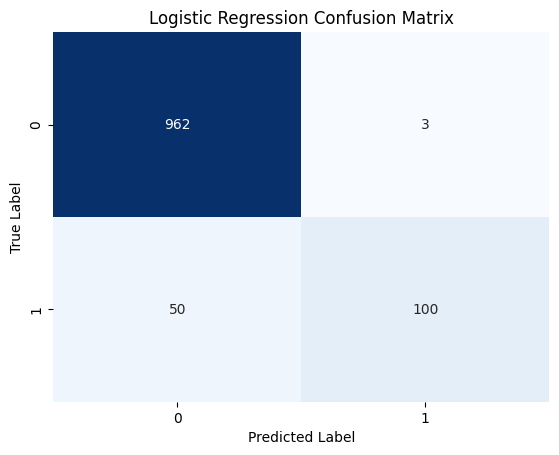

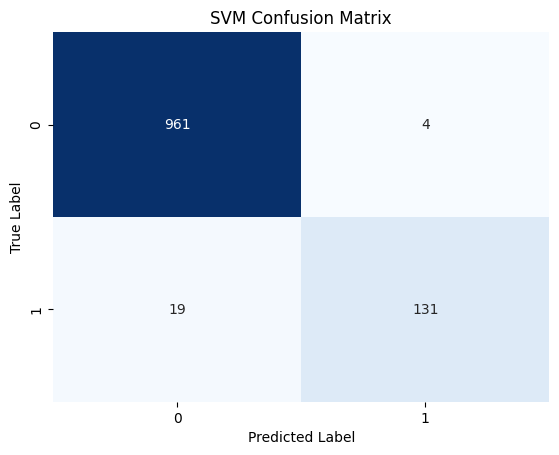

In [2]:
# Install Kaggle library
!pip install kaggle

# Upload the Kaggle API token
from google.colab import files
files.upload()

# Move the Kaggle token to the appropriate directory and set file permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d uciml/sms-spam-collection-dataset

# Unzip the dataset
!unzip sms-spam-collection-dataset.zip

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the dataset and keep only relevant columns
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only the label and message columns
df.columns = ['label', 'message']  # Rename columns for easier reference

# Display the first few records to verify
df.head()

# Convert 'ham' and 'spam' labels to numeric format (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for missing data
if df.isnull().sum().sum() == 0:
    print("No missing values detected.")
else:
    print("There are missing values in the dataset.")

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer to convert messages to numerical form
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Function to evaluate models and print performance metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
evaluate_model(nb_model, X_test_tfidf, y_test, "Naive Bayes")

# Train Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression")

# Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
evaluate_model(svm_model, X_test_tfidf, y_test, "SVM")
# Function to evaluate models and print performance metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Predictions on training data
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predictions on testing data
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate precision, recall, F1 score for the test set
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Print metrics
    print(f"{model_name} Evaluation:")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
    print("="*60)

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
evaluate_model(nb_model, X_train_tfidf, X_test_tfidf,  y_train, y_test, "Naive Bayes")

# Train Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
evaluate_model(lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "Logistic Regression")

# Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
evaluate_model(svm_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "SVM")

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, nb_model.predict(X_test_tfidf), 'Naive Bayes')
plot_confusion_matrix(y_test, lr_model.predict(X_test_tfidf), 'Logistic Regression')
plot_confusion_matrix(y_test, svm_model.predict(X_test_tfidf), 'SVM')

